In [2]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

def sigmoid(Z):
    A= 1/(1+np.exp(-Z))
    cache = Z
    assert(A.shape == Z.shape)
    return A,cache

def relu(Z):
    A = np.maximum(0,Z)
    cache = Z
    assert(A.shape == Z.shape)
    return A,cache

#Dz= dA*differnrential of A

def sigmoid_backward(dA,cache): #cache = Z
    Z = cache
    dfA = 1/(1+np.exp(-Z))
    dZ = dA* dfA*(1-dfA)
    
    assert(dZ.shape == Z.shape)
    
    return dZ

def relu_backward(dA,cache):
    Z=cache
    dfA = np.where(Z>=0,1,0)
    dZ = dA * dfA
    
    assert(dZ.shape == Z.shape)
    
    return dZ
    
    

In [3]:
b = np.array(([2,1,2],[4,6,8]))
b = b*(1/2)*(2/2)
print(b)

[[1.  0.5 1. ]
 [2.  3.  4. ]]


In [4]:
def initialize_weights(layer_dimn):
    L = len(layer_dimn)
   
    parameters = {}
    for i in range(1,L):
        parameters["W"+str(i)] = np.random.randn(layer_dimn[i],layer_dimn[i-1])*np.sqrt((2/layer_dimn[i-1]))
        parameters["b" + str(i)] = np.zeros((layer_dimn[i],1))
        
        assert(parameters['W' + str(i)].shape == (layer_dimn[i], layer_dimn[i-1]))
        assert(parameters['b' + str(i)].shape == (layer_dimn[i], 1))
    return parameters

In [5]:
parameters = initialize_weights([5,4,3])
print("W1 = " + str(parameters["W1"].shape))
print("b1 = " + str(parameters["b1"].shape))
print("W2 = " + str(parameters["W2"].shape))
print("b2 = " + str(parameters["b2"].shape))

W1 = (4, 5)
b1 = (4, 1)
W2 = (3, 4)
b2 = (3, 1)


In [6]:
def linear_forward(A,W,b):

	Z=np.dot(W,A) + b

	assert(Z.shape ==(W.shape[0],A.shape[1]))

	cache = (A,W,b)
	return Z,cache

In [7]:
A=np.array([[ 1.62434536 ,-0.61175641],
 [-0.52817175 ,-1.07296862],
 [ 0.86540763 ,-2.3015387 ]] )
W = np.array([[ 1.74481176, -0.7612069  , 0.3190391 ]])
b=np.array( [[-0.24937038]])
Z,c=linear_forward(A,W,b)
print(Z)

[[ 3.26295336 -1.23429988]]


In [8]:
def linear_activation_forward(A_prev,W,b,activation):
    
    if activation == "sigmoid":
        Z,linear_cache = linear_forward(A_prev,W,b)
        A,activation_cache = sigmoid(Z)
        
    elif activation == "relu":
        Z,linear_cache = linear_forward(A_prev,W,b)
        A,activation_cache = relu(Z)
    
    assert(A.shape== (W.shape[0],A_prev.shape[1]))
    
    cache =(linear_cache,activation_cache)
    
    return A,cache
        
    

In [9]:
A_prev = np.array([[-0.41675785, -0.05626683],
 [-2.1361961 ,1.64027081],
 [-1.79343559 ,-0.84174737]])
W = np.array([[ 0.50288142, -1.24528809, -1.05795222]])
b=np.array([[-0.90900761]])
A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print("With sigmoid: A = " + str(A))

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
print("With ReLU: A = " + str(A))


With sigmoid: A = [[0.96890023 0.11013289]]
With ReLU: A = [[3.43896134 0.        ]]


In [10]:
def forward_propagation(X,parameters):
    
    
    caches = []
    L = len(parameters) // 2
    A=X
    
    for i in range(1,L):
        A_prev = A
        A,cache = linear_activation_forward(A_prev,parameters["W" + str(i)],parameters["b"+str(i)],activation = "relu")
        caches.append(cache)
        
    #last layer sigmoid
    AL,cache = linear_activation_forward(A,parameters["W" + str(L)],parameters["b"+str(L)],activation = "sigmoid")
    caches.append(cache)
    # AL -> last activation func( sig)
    #single output
   
   # assert(AL.shape == (1,X.shape[1]))
    
    return AL,caches

In [11]:
X = np.array([[-0.31178367 , 0.72900392,  0.21782079, -0.8990918 ],
 [-2.48678065 , 0.91325152 , 1.12706373, -1.51409323],
 [ 1.63929108 ,-0.4298936  , 2.63128056 , 0.60182225],
 [-0.33588161 , 1.23773784  ,0.11112817  ,0.12915125],
 [ 0.07612761 ,-0.15512816  ,0.63422534 , 0.810655  ]])
parameters={'W2': np.array([[-0.12673638, -1.36861282,  1.21848065, -0.85750144],
       [-0.56147088, -1.0335199 ,  0.35877096,  1.07368134],
       [-0.37550472,  0.39636757, -0.47144628,  2.33660781]]), 'b2': np.array([[ 1.50278553],
       [-0.59545972],
       [ 0.52834106]]), 'b1': np.array([[ 1.38503523],
       [-0.51962709],
       [-0.78015214],
       [ 0.95560959]]), 'b3': np.array([[-0.16236698]]), 'W1': np.array([[ 0.35480861,  1.81259031, -1.3564758 , -0.46363197,  0.82465384],
       [-1.17643148,  1.56448966,  0.71270509, -0.1810066 ,  0.53419953],
       [-0.58661296, -1.48185327,  0.85724762,  0.94309899,  0.11444143],
       [-0.02195668, -2.12714455, -0.83440747, -0.46550831,  0.23371059]]), 'W3':np. array([[ 0.9398248 ,  0.42628539, -0.75815703]])}



In [12]:
AL,caches = forward_propagation(X,parameters)
print(AL.shape)
print(X.shape)

(1, 4)
(5, 4)


In [13]:
def compute_cost(AL,Y):

    m =Y.shape[1]
    
    cost = np.sum(np.multiply(Y,np.log(AL)),axis=1,keepdims=True) + np.sum(np.multiply(1-Y,np.log(1-AL)),axis=1,keepdims=True)
    cost=np.sum(cost)
    cost = cost/-m  
    
    cost = np.squeeze(cost) #(will turn [[13]] -> 13)
    
    assert(cost.shape == ())
    return cost

In [14]:
def compute_cost_with_regularization(AL,Y,parameters,lambdaa):
    if lambdaa == 0: 
       
        
        return compute_cost(AL,Y)
    else:
        
        m = Y.shape[1]
        reg_cost = 0
        for i in range(len(parameters)//2):
            reg_cost += np.sum(np.square(parameters["W"+str(i+1)]))

        return (compute_cost(AL,Y)) + ((reg_cost*(1/m)*(lambdaa/2)))
    

In [15]:
Y= np.array([[1, 1, 1]])
AL = np.array([[ 0.8,  0.9,  0.4]])
print(compute_cost(AL,Y))

0.414931599615397


In [16]:
def linear_backward(dZ,cache):
    
    A_prev,W,b = cache
    m = A_prev.shape[1]
    
    dW = np.dot(dZ,A_prev.T)/m
    db = np.sum(dZ,axis=1,keepdims=True)/m
    dA_prev = np.dot(W.T,dZ)
    
    assert(dA_prev.shape == A_prev.shape)
    assert(dW.shape == W.shape)
    assert(db.shape == b.shape)
    
    return dA_prev,dW,db

    

In [17]:
dZ = np.array([[ 1.62434536, -0.61175641]])
linear_cache = (np.array([[-0.52817175, -1.07296862],
       [ 0.86540763, -2.3015387 ],
       [ 1.74481176, -0.7612069 ]]),np.array([[ 0.3190391 , -0.24937038,  1.46210794]]),np.array([[-2.06014071]]))

In [18]:
dA_prev, dW, db = linear_backward(dZ, linear_cache)
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

dA_prev = [[ 0.51822968 -0.19517421]
 [-0.40506362  0.15255393]
 [ 2.37496825 -0.8944539 ]]
dW = [[-0.10076895  1.40685096  1.64992504]]
db = [[0.50629448]]


In [19]:
def linear_activation_backward(dA,cache,activation):
    
    linear_cache,activation_cache = cache
    
    if activation == "sigmoid":
        dZ = sigmoid_backward(dA,activation_cache)
        dA_prev,dW,db = linear_backward(dZ,linear_cache)
        
    elif activation == "relu":
        dZ = relu_backward(dA,activation_cache)
        dA_prev,dW,db = linear_backward(dZ,linear_cache)
    
    return dA_prev,dW,db 
        

In [20]:
dAL = np.array([[-0.41675785,-0.05626683]])
linear_activation_cache = ((np.array([[-2.1361961 ,  1.64027081],
       [-1.79343559, -0.84174737],
       [ 0.50288142, -1.24528809]]), np.array([[-1.05795222, -0.90900761,  0.55145404]]), 
        np.array([[ 2.29220801]])), np.array([[ 0.04153939, -1.11792545]]))

In [21]:
dA_prev, dW, db = linear_activation_backward(dAL, linear_activation_cache, activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

dA_prev, dW, db = linear_activation_backward(dAL, linear_activation_cache, activation = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

sigmoid:
dA_prev = [[ 0.11017994  0.0110534 ]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576155]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]

relu:
dA_prev = [[ 0.44090989  0.        ]
 [ 0.37883606  0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513825  0.37371418 -0.10478989]]
db = [[-0.20837892]]


In [22]:
def backward_propogation(AL,Y,caches):
    grads={}
    #Y = Y.reshape(AL.shape)
    dAL = -((np.divide(Y,AL)) - (np.divide(1-Y,1-AL)))
    
    L = len(caches)
    current_cache = caches[L-1]
    grads["dA" + str(L-1)],grads["dW" + str(L)],grads["db" + str(L)] = linear_activation_backward(dAL,current_cache, activation = "sigmoid")
    
    for i in reversed(range(L-1)):
        current_cache = caches[i]
        dA_prev_temp,dW_temp,db_temp = linear_activation_backward(grads["dA" + str(i+1)],current_cache,activation="relu")
        grads["dA" + str(i)] = dA_prev_temp
        grads["dW" + str(i+1)] = dW_temp
        grads["db" + str(i+1)] = db_temp
    
    return grads
    

In [23]:
l=4
print(l-1,l)
for i in reversed(range(l-1)):
    print(i+1,i)

3 4
3 2
2 1
1 0


In [24]:
def updating_weights_with_reg(parameters,grads,lamb_m):
    
    L = len(grads) - len(parameters)
    
    for i in range(L):
        grads["dW" + str(i+1)] = grads["dW" + str(i+1)] + ((lamb_m)* parameters["W" + str(i+1)])
    

In [25]:
AL = np.array([[ 1.78862847 , 0.43650985]])
y = np.array([[1 ,0]])
caches = (((np.array([[ 0.09649747, -1.8634927 ],
       [-0.2773882 , -0.35475898],
       [-0.08274148, -0.62700068],
       [-0.04381817, -0.47721803]]), np.array([[-1.31386475,  0.88462238,  0.88131804,  1.70957306],
       [ 0.05003364, -0.40467741, -0.54535995, -1.54647732],
       [ 0.98236743, -1.10106763, -1.18504653, -0.2056499 ]]), np.array([[ 1.48614836],
       [ 0.23671627],
       [-1.02378514]])), np.array([[-0.7129932 ,  0.62524497],
       [-0.16051336, -0.76883635],
       [-0.23003072,  0.74505627]])), ((np.array([[ 1.97611078, -1.24412333],
       [-0.62641691, -0.80376609],
       [-2.41908317, -0.92379202]]), np.array([[-1.02387576,  1.12397796, -0.13191423]]), np.array([[-1.62328545]])), np.array([[ 0.64667545, -0.35627076]])))
grads = backward_propogation(AL,y,caches)
print(grads)

{'dA1': array([[ 0.12913162, -0.44014127],
       [-0.14175655,  0.48317296],
       [ 0.01663708, -0.05670697]]), 'dW2': array([[-0.39202432, -0.13325855, -0.04601089]]), 'db2': array([[0.15187861]]), 'dA0': array([[ 0.        ,  0.52257901],
       [ 0.        , -0.3269206 ],
       [ 0.        , -0.32070404],
       [ 0.        , -0.74079187]]), 'dW1': array([[0.41010002, 0.07807203, 0.13798444, 0.10502167],
       [0.        , 0.        , 0.        , 0.        ],
       [0.05283652, 0.01005865, 0.01777766, 0.0135308 ]]), 'db1': array([[-0.22007063],
       [ 0.        ],
       [-0.02835349]])}


In [26]:
def gradient_descent(parameters,grads,learning_rate):
    L = len(parameters) //2
    
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - (learning_rate*grads["dW"+str(l+1)])
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - (learning_rate*grads["db"+str(l+1)])
    return parameters

In [27]:
def init_adam_prm(parameters):
    v,s= {},{}
    L = len(parameters)//2
    for i in range(L):
        v["dW" + str(i+1)] = np.zeros(parameters["W" + str(i+1)].shape)
        v["db" + str(i+1)] = np.zeros(parameters["b" + str(i+1)].shape)
        s["dW" + str(i+1)] = np.zeros(parameters["W" + str(i+1)].shape)
        s["db" + str(i+1)] = np.zeros(parameters["b" + str(i+1)].shape)
        
    return v,s
    

In [122]:
def adam_optimizer(parameters,grads,v,s,t,learning_rate=0.01,beta1=0.9,beta2=0.999,epsilon=1e-8):
    #print(learning_rate)
    v_corrected,s_corrected={},{}
    L = len(parameters)//2
    for i in range(L):
        v["dW" + str(i+1)] = beta1 * v["dW" + str(i+1)] + (1-beta1)*grads["dW" + str(i+1)]
        v["db" + str(i+1)] = beta1 * v["db" + str(i+1)] + (1-beta1)*grads["db" + str(i+1)]
        
        v_corrected["dW" + str(i+1)] = v["dW" + str(i+1)]/(1-(beta1**t))
        v_corrected["db" + str(i+1)] = v["db" + str(i+1)]/(1-(beta1**t))
        
        s["dW" + str(i+1)] = beta2 * s["dW" + str(i+1)] + (1-beta2)*(grads["dW" + str(i+1)]**2)
        s["db" + str(i+1)] = beta2 * s["db" + str(i+1)] + (1-beta2)*(grads["db" + str(i+1)]**2)
        
        s_corrected["dW" + str(i+1)] = s["dW" + str(i+1)]/(1-(beta2**t))
        s_corrected["db" + str(i+1)] = s["db" + str(i+1)]/(1-(beta2**t))
        
        parameters["W" + str(i+1)] =parameters["W" + str(i+1)] - (learning_rate*(v_corrected["dW" + str(i+1)]/(np.sqrt(s_corrected["dW" + str(i+1)])+epsilon)))
        parameters["b" + str(i+1)] =parameters["b" + str(i+1)] - (learning_rate*(v_corrected["db" + str(i+1)]/(np.sqrt(s_corrected["db" + str(i+1)])+epsilon)))
    
                                                                  
    return parameters,v,s

In [64]:
parameters={'W1': np.array([[ 1.62434536, -0.61175641, -0.52817175],
       [-1.07296862,  0.86540763, -2.3015387 ]]), 'b1': np.array([[ 1.74481176],
       [-0.7612069 ]]), 'W2': np.array([[ 0.3190391 , -0.24937038,  1.46210794],
       [-2.06014071, -0.3224172 , -0.38405435],
       [ 1.13376944, -1.09989127, -0.17242821]]), 'b2': np.array([[-0.87785842],
       [ 0.04221375],
       [ 0.58281521]])}

grads = {'dW1': np.array([[-1.10061918,  1.14472371,  0.90159072],
       [ 0.50249434,  0.90085595, -0.68372786]]), 'db1': np.array([[-0.12289023],
       [-0.93576943]]), 'dW2': np.array([[-0.26788808,  0.53035547, -0.69166075],
       [-0.39675353, -0.6871727 , -0.84520564],
       [-0.67124613, -0.0126646 , -1.11731035]]), 'db2': np.array([[ 0.2344157 ],
       [ 1.65980218],
       [ 0.74204416]])}

In [66]:
parameters,v,s = adam_optimizer(parameters, grads, t=2)

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))
print("v[\"dW1\"] = " + str(v["dW1"]))
print("v[\"db1\"] = " + str(v["db1"]))
print("v[\"dW2\"] = " + str(v["dW2"]))
print("v[\"db2\"] = " + str(v["db2"]))
print("s[\"dW1\"] = " + str(s["dW1"]))
print("s[\"db1\"] = " + str(s["db1"]))
print("s[\"dW2\"] = " + str(s["dW2"]))
print("s[\"db2\"] = " + str(s["db2"]))

W1 = [[ 1.6392281  -0.62663915 -0.54305449]
 [-1.08785136  0.85052489 -2.28665596]]
b1 = [[ 1.75969449]
 [-0.74632416]]
W2 = [[ 0.33392184 -0.26425312  1.47699068]
 [-2.04525797 -0.30753446 -0.36917161]
 [ 1.14865218 -1.08500855 -0.15754547]]
b2 = [[-0.89274116]
 [ 0.02733101]
 [ 0.56793247]]
v["dW1"] = [[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]]
v["db1"] = [[-0.01228902]
 [-0.09357694]]
v["dW2"] = [[-0.02678881  0.05303555 -0.06916607]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]]
v["db2"] = [[0.02344157]
 [0.16598022]
 [0.07420442]]
s["dW1"] = [[0.00121136 0.00131039 0.00081287]
 [0.0002525  0.00081154 0.00046748]]
s["db1"] = [[1.51020086e-05]
 [8.75664426e-04]]
s["dW2"] = [[7.17640234e-05 2.81276925e-04 4.78394593e-04]
 [1.57413364e-04 4.72206320e-04 7.14372574e-04]
 [4.50571367e-04 1.60392093e-07 1.24838242e-03]]
s["db2"] = [[5.49507204e-05]
 [2.75494328e-03]
 [5.50629535e-04]]


In [29]:
def prediction(X,Y,parameters):
    
    m = X.shape[1]
    p = np.zeros((1,m))
    
    problty,cache = forward_propagation(X,parameters)

    p = np.argmax(problty,axis=0)+1
    p=p.reshape(1,p.shape[0])
    print("prediction accuracy" + " " + str(np.sum((p == Y))/m))
    
    return p

In [147]:
import random
def data(path):

    os.chdir(path)
    #os.chdir("cats")
    aa=["cats","dogs"]
    training_data=[]

    #print(X)
    for a in aa:
        path = os.path.join(os.getcwd(),a)
        ind = aa.index(a) + 1
        print(path)
        for img in os.listdir(path):
            try:

                image  = Image.open(os.path.join(path,img))
                image = image.convert("L")
                image =image.resize((80,80))
                
                image = np.array(image)
                training_data.append([image,ind])
            except IOError:
                pass
    
    random.shuffle(training_data)
    X=[]
    Y=[]
    for x,y in training_data:
        X.append(x)
        Y.append(y)
    X=np.array(X)
    Y = np.array(Y)
    
    X=X.reshape(X.shape[0], -1).T
    
    Y=Y.reshape(1,Y.shape[0])
  

          
    return X,Y

In [149]:
os.chdir("../../../")

print(os.getcwd())


X_train,Y_train = data("cat-and-dog/training_set")
print("done")

C:\Users\LAPY\Desktop
C:\Users\LAPY\Desktop\cat-and-dog\training_set\cats
C:\Users\LAPY\Desktop\cat-and-dog\training_set\dogs
done


In [150]:
os.chdir("../../")
print(os.getcwd())
print(X_train.shape,Y_train.shape)

C:\Users\LAPY\Desktop
(6400, 8005) (1, 8005)


In [218]:
print(Y_test)

[[1 2 2 2 2 2 2 2 2 1 2 1 2 1 2 2 2 2 1 1 1 1 1 2 1 1 1 1 2 1 2 1 1 1 1 2
  1 2 2 1 2 1 2 1 1 1 1 2 1 1 2 1 2 2 2 2 2 2 1 1 1 1 2 1 2 2 2 2 1 2 2 1
  1 1 2 2 1 1 2 2 1 2 1 1 1 2 2 2 2 1]]


In [219]:
a = np.where(Y_test ==2,1,0)
print(a)

[[0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1
  0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0
  0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 0]]


In [151]:
X_test,Y_test = data("cat-and-dog/test_set/test_set")
print(X_test.shape,Y_test.shape)
print("done")

C:\Users\LAPY\Desktop\cat-and-dog\test_set\test_set\cats
C:\Users\LAPY\Desktop\cat-and-dog\test_set\test_set\dogs
(6400, 2023) (1, 2023)
done


In [155]:
print(X_test)

[[0.61960784 0.38039216 0.65098039 ... 0.7372549  0.81568627 0.14117647]
 [0.63921569 0.41960784 0.41176471 ... 0.75294118 0.74117647 0.1254902 ]
 [0.65490196 0.41960784 0.33333333 ... 0.72941176 0.84313725 0.14117647]
 ...
 [0.98823529 0.61568627 0.38431373 ... 0.58431373 0.29019608 0.7254902 ]
 [0.98823529 0.61176471 0.3254902  ... 0.58823529 0.52156863 0.71764706]
 [0.98823529 0.63137255 0.34117647 ... 0.60392157 0.30980392 0.70588235]]


In [154]:
X_train = X_train/255

X_test = X_test/255


In [132]:
def dict_to_vec(dic):
    keys = list(dic.keys())
    for i in range(len(keys)):
        if i == 0:
            vec = np.reshape(dic[str(keys[i])],(dic[str(keys[i])].shape[0]*dic[str(keys[i])].shape[1],1))
        else:
            other_vec =  np.reshape(dic[str(keys[i])],(dic[str(keys[i])].shape[0]*dic[str(keys[i])].shape[1],1)) 
            vec = np.concatenate((vec,other_vec))
    return vec

In [169]:
def vec_to_dict(dic,vec):
    dc = {}
    keys = list(dic.keys())
    l=0
    for i in range(len(keys)):
        
        dc[str(keys[i])] = vec[l:((dic[str(keys[i])].shape[0]*dic[str(keys[i])].shape[1]) + l)]
        dc[str(keys[i])] = np.reshape(dc[str(keys[i])],(dic[str(keys[i])].shape[0],dic[str(keys[i])].shape[1]))
       
        l += dic[str(keys[i])].shape[0]*dic[str(keys[i])].shape[1]
        
    return dc

In [212]:
def gradients_to_vector(gradients):
    """
    Roll all our gradients dictionary into a single vector satisfying our specific required shape.
    """
    
    count = 0
    for key in ["dW1", "db1", "dW2", "db2", "dW3", "db3"]:
        # flatten parameter
        new_vector = np.reshape(gradients[key], (-1,1))
        
        if count == 0:
            theta = new_vector
        else:
            theta = np.concatenate((theta, new_vector), axis=0)
        count = count + 1

    return theta

In [42]:
def gradient_checking(parameters,gradients,X,Y,epsilon = 1e-7):
    
    param_vec = dict_to_vec(parameters)
    grad = gradients_to_vector(gradients)
    num_param = param_vec.shape[0]
    J_plus = np.zeros((num_param,1))
    J_minus = np.zeros((num_param,1))
    grad_approx = np.zeros((num_param,1))
    
    for i in range(num_param):
        
        theta_plus = np.copy(param_vec)
        theta_plus[i][0] += epsilon
        AL,_ = forward_propagation(X,vec_to_dict(parameters,theta_plus))
        J_plus[i] = compute_cost(AL,Y)
        
        theta_minus = np.copy(param_vec)
        theta_minus[i][0] -= epsilon
        AL,_ = forward_propagation(X,vec_to_dict(parameters,theta_minus))
        J_minus[i] = compute_cost(AL,Y)
        
        grad_approx[i] = (J_plus[i] - J_minus[i])/(2*epsilon)
        
    numerator = np.linalg.norm(grad - grad_approx)
    denomenator = np.linalg.norm(grad) + np.linalg.norm(grad_approx)
    
    difference = numerator/denomenator
    
    if difference > 2e-7:
        print ("\033[93m" + "There is a mistake in the backward propagation! difference = " + str(difference) + "\033[0m")
    else:
        print ("\033[92m" + "Your backward propagation works perfectly fine! difference = " + str(difference) + "\033[0m")
    
    return difference
        
    

In [39]:
def init_mini_batches(X,Y,mini_batch_size):
    m = X.shape[1]
    
    num_complete_minibatches = m//mini_batch_size
    mini_batches = []
    
    for i in range(num_complete_minibatches):
        mini_batch_X = X[:, i*mini_batch_size:(i+1)*mini_batch_size ] 
        mini_batch_Y = Y[:, i*mini_batch_size:(i+1)*mini_batch_size ]
        
        mini_batch = (mini_batch_X,mini_batch_Y)
        mini_batches.append(mini_batch)
        
    if m%mini_batch_size!=0:
        mini_batch_X = X[:, num_complete_minibatches*mini_batch_size:m ] 
        mini_batch_Y = Y[:, num_complete_minibatches*mini_batch_size:m ]
        
        mini_batch = (mini_batch_X,mini_batch_Y)
        mini_batches.append(mini_batch)
    return mini_batches
    
    

In [33]:
a = np.array(([1,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15],[16,17,18],[19,20,21],[22,23,24],[25,26,27],[28,29,30]))
a=a.T
b =np.array(([1],[1],[0],[1],[1],[0],[0],[0],[1],[0]))
b=b.T
c=init_mini_batches(a,b,8)
print(c)

[(array([[ 1,  4,  7, 10, 13, 16, 19, 22],
       [ 2,  5,  8, 11, 14, 17, 20, 23],
       [ 3,  6,  9, 12, 15, 18, 21, 24]]), array([[1, 1, 0, 1, 1, 0, 0, 0]])), (array([[25, 28],
       [26, 29],
       [27, 30]]), array([[1, 0]]))]


In [34]:
def two_layer_model(X,Y,layer_dims,num_iters,learning_rate,print_cost):
    grads = {}
    costs = []
    m = X.shape[1]
    
    parameters = initialize_weights(layer_dims)
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
   
    
    for i in range(0,num_iters):
        A1,cache1 = linear_activation_forward(X,W1,b1,activation = "relu")
        A2,cache2 = linear_activation_forward(A1,W2,b2,activation = "sigmoid")
        
        cost = compute_cost(A2,Y)
        print(cost)
        dA2  = -((np.divide(Y,A2)) - (np.divide(1-Y,1-A2)))
       
        break
        dA1,dW2,db2 = linear_activation_backward(dA2,cache2,activation="sigmoid")
        dA0,dW1,db1 = linear_activation_backward(dA1,cache1,activation="relu")
        
        grads["dW1"] = dW1 
        grads["db1"] = db1
        grads["dW2"] = dW2 
        grads["db2"] = db2
        
        parameters = gradient_descent(parameters,grads,learning_rate)
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 1000 == 0:
            costs.append(cost)
    
    
    
    plt.plot(np.squeeze(costs))
    plt.show()
    
    return parameters
    

In [189]:
def nn(X,Y,layer_dims,num_iters,learning_rate,print_cost):
    
    m = X.shape[1]
    grads = {}
    costs = []
    
    y=np.array(([1,2],))
    
   # mini_batches = init_mini_batches(X,Y,1024)
    
    parameters = initialize_weights(layer_dims)
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    for i in range(0,num_iters):
        
        shuffle(X,Y,i+1)
        mini_batches = init_mini_batches(X,Y,64)
            
        cost=0
        
        for mini_batch in mini_batches:
            
            
            
            (minibatch_X,minibatch_Y) = mini_batch
            n=minibatch_Y.shape[1]
        
            z1 = np.dot(W1,minibatch_X) + b1

            A1,_ = relu(z1)

            z2 = np.dot(W2,A1) + b2

            A2,_ = sigmoid(z2)

            reg = np.sum(np.square(W1)) + np.sum(np.square(W2)) 

            #multioutput y_o

            y_o = np.where(y == minibatch_Y.T,1,0)
            y_o = y_o.T

            cost += compute_cost(A2,y_o) #+ (reg*(lamd/2)*(1/m))

            dA2  = -((np.divide(y_o,A2)) - (np.divide(1-y_o,1-A2)))
        
            dz2 = sigmoid_backward(dA2,z2)

            dW2 = (np.dot(dz2,A1.T)/n) #+ ((lamd/m)*W2)

            db2 = 1./n * (np.sum(dz2, axis=1, keepdims = True))

            dA1 = np.dot(W2.T,dz2)

            dz1 = relu_backward(dA1,z1)

            dW1 = (np.dot(dz1,minibatch_X.T)/n) #+ ((lamd/m)*W1)
            db1 = 1./n *( np.sum(dz1 , axis=1, keepdims = True))


            grads["dW1"] = dW1 
            grads["db1"] = db1
            grads["dW2"] = dW2 
            grads["db2"] = db2

            parameters = gradient_descent(parameters,grads,learning_rate)
            W1 = parameters["W1"]
            b1 = parameters["b1"]
            W2 = parameters["W2"]
            b2 = parameters["b2"]
        
        
        if print_cost and i %25 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost/len(mini_batches))))
        if print_cost and i % 1 == 0:
            costs.append(cost/len(mini_batches))
    
    
    
    plt.plot(np.squeeze(costs))
    plt.show()
    
    return parameters
        
        
        
        
        
    
    
    

In [180]:
def shuffle(a,b,seed):
    np.random.seed(seed)
    np.random.shuffle(a)
    np.random.seed(seed)
    np.random.shuffle(b)

In [187]:
def L_layered_network(X,Y,layer_dims,num_iters,learning_rate,print_cost,lambdaa):
    m = X.shape[1]
    costs = []
    lamd_m = (lambdaa/m)
    parameters = initialize_weights(layer_dims)
    v,s = init_adam_prm(parameters)
    L = len(parameters)//2
    
    
    y=np.array(([1,2],))
    t=0
    for i in range(0,num_iters):

        try:
            
            shuffle(X,Y,i+1)
            mini_batches = init_mini_batches(X,Y,64)
            
            cost=0

            for mini_batch in mini_batches:

                (minibatch_X,minibatch_Y) = mini_batch
                #shuffle(minibatch_X,minibatch_Y,)
                #n=minibatch_Y.shape[0]

                AL,caches = forward_propagation(minibatch_X,parameters)
                y_o = np.where(y == minibatch_Y.T,1,0)
                y_o = y_o.T
                #print(AL)
                #break
                cost += compute_cost(AL,y_o)

                grads = backward_propogation(AL,y_o,caches)

                #updating_weights_with_reg(parameters,grads,lamd_m)
                #for I in range(L):
                    #grads["dW" + str(I+1)] = grads["dW" + str(I+1)] #+ ((lamd_m)* parameters["W" + str(I+1)])
                t=t+1
                parameters,v,s = adam_optimizer(parameters,grads,v,s,t,learning_rate=0.000055)
                #parameters = gradient_descent(parameters,grads,0.0001)

            if print_cost and i % 20 == 0:
                
                print("Cost after iteration {}: {}".format(i, np.squeeze(cost)/len(mini_batches)))
            if print_cost and i % 1 == 0:
                costs.append(cost/len(mini_batches))
        except KeyboardInterrupt:
            plt.plot(np.squeeze(costs))
            plt.show()


            return parameters 
            


    
    plt.plot(np.squeeze(costs))
    plt.show()
        
        
    return parameters    
    

In [190]:
layer_dims =  (X_train.shape[0],200,2)
parameters = nn(X_train,Y_train,layer_dims,num_iters=2001,learning_rate=0.00045,print_cost=True)
print(parameters.keys())
print(len(parameters))

Cost after iteration 0: 1.4068378108898734
Cost after iteration 25: 1.3925745734402146
Cost after iteration 50: 1.386338302527319
Cost after iteration 75: 1.3851511817962963
Cost after iteration 100: 1.3910320012052195
Cost after iteration 125: 1.3838821530054357
Cost after iteration 150: 1.3825093885287194
Cost after iteration 175: 1.3817771129906287
Cost after iteration 200: 1.3804529188575896
Cost after iteration 225: 1.3819510678321134
Cost after iteration 250: 1.383977142555409
Cost after iteration 275: 1.3806043485891208
Cost after iteration 300: 1.3815919525288654
Cost after iteration 325: 1.380194672016705
Cost after iteration 350: 1.3787663173103986
Cost after iteration 375: 1.3859551318896257
Cost after iteration 400: 1.3750403573062695
Cost after iteration 425: 1.3843469386146359
Cost after iteration 450: 1.3792777667651164
Cost after iteration 475: 1.3808534713805294
Cost after iteration 500: 1.3816538925635609
Cost after iteration 525: 1.3802317604626404
Cost after iterati

KeyboardInterrupt: 

In [37]:
import csv
def mnist(data):
    f = open(data)
    reader = csv.reader(f)
    i=0 
    lst=[]
    for read in reader:


        im = np.array(read,dtype=float)

        im=im.reshape(1,im.shape[0])

        lst.append(im)




    X=np.array(lst)

    X=X.reshape(X.shape[0],X.shape[1]*X.shape[2])
    X=X.T
    
    return X


In [38]:

f = open("al/train.csv")
reader = csv.reader(f)
i=0 
lst=[]
for read in reader:
    
        
    im = np.array(read,dtype=float)
    y=int(im[0])
    im=im[1:im.shape[0]]
    im=im.reshape(im.shape[0],1)
   
    lst.append([im,y])

X=[]
Y=[]  
for x,y in lst:
    X.append(x)
    Y.append(y)
    
X_m=np.array(X)
X_m=X_m.reshape(X_m.shape[1]*X_m.shape[2],X_m.shape[0])
Y_m=np.array(Y)
Y_m=Y_m.reshape(1,Y_m.shape[0])

In [39]:
X_m=X_m/255

In [147]:
#os.chdir("../../../")
print(os.getcwd())
mnist_X=mnist("mnist/train_images_mnist.csv")
print(mnist_X.shape)

C:\Users\LAPY\Desktop
(784, 60000)


In [148]:
mnist_Y=mnist("mnist/train_labels_mnist.csv")
print(mnist_Y.shape)

(1, 60000)


In [42]:
mnist_test_X = mnist("mnist/test_images_mnist.csv")
print(mnist_test_X.shape)
mnist_test_Y = mnist("mnist/test_labels_mnist.csv")
print(mnist_test_Y.shape)

(784, 10000)
(1, 10000)


In [128]:
print(X_m.shape)

(784, 42000)


Cost after iteration 0: 1.3845714494932548
Cost after iteration 50: 1.3922784568311228
Cost after iteration 100: 1.3923293699932775
Cost after iteration 150: 1.3922650148135083
Cost after iteration 200: 1.3922019683133884
Cost after iteration 250: 1.39214440700892


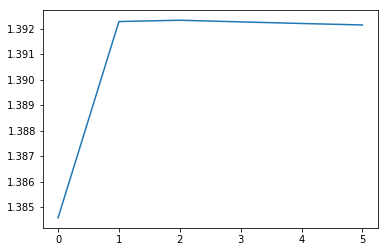

dict_keys(['W1', 'b1', 'W2', 'b2', 'W3', 'b3', 'W4', 'b4'])
8


In [53]:
print(X_train.shape,Y_train.shape)

NameError: name 'X_train' is not defined

In [144]:
def pred(X,Y,parameters):
    z1 = np.dot(parameters["W1"],X) + parameters["b1"]
        
    A1,_ = relu(z1)
        
    z2 = np.dot(parameters["W2"],A1) + parameters["b2"]
        
    problty,_ = sigmoid(z2) 
    m = X.shape[1]
    p = np.zeros((1,m))
    
   
    
    #p = np.where(problty>0.5,1,0)
    p=np.argmax(problty,axis=0)+1
    print("prediction accuracy" + " " + str(np.sum((p == Y))/m))
    
    return p

In [172]:
z1 = np.dot(parameters["W1"],X_train) + parameters["b1"]
        
A1,_ = relu(z1)
        
z2 = np.dot(parameters["W2"],A1) + parameters["b2"]
        
problty,_ = sigmoid(z2) 
print(problty.shape)

(2, 2022)


In [90]:
Y==np.array(Y,dtype=int)
print(Y)

[[1. 0. 1. ... 7. 6. 9.]]


In [96]:
print(type(Y[0,1]))

<class 'numpy.int32'>


In [98]:
a = np.array(([1,2,1,1,2,1],)).T
b= np.array(([1,2],))
print(a,b.shape)
c=np.where(b==Y,1,0)
print(c.T.shape,c.T)
print(c)

[[1]
 [2]
 [1]
 [1]
 [2]
 [1]] (1, 2)
() 0
0


c:\users\lapy\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  after removing the cwd from sys.path.


In [100]:
print(X_train.shape,Y_train.shape)

(10000, 8005) (1, 8005)


In [185]:
p=prediction(X_train,Y_train,parameters)

prediction accuracy 0.5487820112429731


In [186]:
p = prediction(X_test,Y_test,parameters)

prediction accuracy 0.5383094414236282


In [133]:
print(p)

[[2 2 1 ... 1 1 1]]


In [125]:
print(Y_test)

[[1 1 1 ... 1 2 2]]


In [191]:
x = np.array([[ 1.62434536 ,-0.61175641, -0.52817175],
 [-1.07296862,  0.86540763, -2.3015387 ],
 [ 1.74481176 ,-0.7612069  , 0.3190391 ],
 [-0.24937038 , 1.46210794 ,-2.06014071]])
y = np.array([[1, 1, 0]])
prm = {'W1': np.array([[-0.3224172 , -0.38405435,  1.13376944, -1.09989127],
       [-0.17242821, -0.87785842,  0.04221375,  0.58281521],
       [-1.10061918,  1.14472371,  0.90159072,  0.50249434],
       [ 0.90085595, -0.68372786, -0.12289023, -0.93576943],
       [-0.26788808,  0.53035547, -0.69166075, -0.39675353]]), 'b1': np.array([[-0.6871727 ],
       [-0.84520564],
       [-0.67124613],
       [-0.0126646 ],
       [-1.11731035]]), 'W2': np.array([[ 0.2344157 ,  1.65980218,  0.74204416, -0.19183555, -0.88762896],
       [-0.74715829,  1.6924546 ,  0.05080775, -0.63699565,  0.19091548],
       [ 2.10025514,  0.12015895,  0.61720311,  0.30017032, -0.35224985]]), 'b2': np.array([[-1.1425182 ],
       [-0.34934272],
       [-0.20889423]]), 'W3': np.array([[ 0.58662319,  0.83898341,  0.93110208]]), 'b3': np.array([[ 0.28558733]])}

In [222]:

al,caches = forward_propagation(x,prm)
gradients = backward_propogation(al,y,caches)
d = gradient_checking(prm,gradients,x,y,epsilon = 1e-7)


Your backward propagation works perfectly fine! difference = 7.045356398327675e-08


In [125]:

X_t = mnist("s.csv")

#X_t=np.array()
X_t=X_t.reshape(X_t.shape[0]*X_t.shape[1],1) 
#print(X_t.shape)
#X_t=X_t.reshape(X_t.shape[0], -1).T
#print(X_t.shape)   
X_t = X_t/255
p,cache = forward_propagation(X_t,parameters)
pr = np.argmax(p,axis=0)
print(p,pr)

NameError: name 'mnist' is not defined

In [152]:
os.chdir("../../../")

In [181]:
o = np.random.randn(4,1)
print(o)

[[ 0.11855978]
 [ 0.05148968]
 [-1.20090158]
 [ 0.09191999]]


In [185]:
o[2]=3
print(o)
        
        
        

[[0.11855978]
 [0.05148968]
 [3.        ]
 [0.09191999]]


In [231]:
print(parameters.keys())
print(len(parameters))

dict_keys(['W1', 'b1', 'W2', 'b2'])
4


NameError: name 'np' is not defined